For Classification

In [156]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px

np.random.seed(9)

## Load the dataset

In [157]:
data = pd.read_csv(r"Housing.csv")
data  

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [158]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Data preprocessing

In [159]:
# Convert categorical to numerical features

categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
cat_encodes = {'yes': 1,
               'no': 0}
furnished_stat = ['furnishingstatus']
f_encodes = {
    'furnished': 1,
    'semi-furnished' : 0,
    'unfurnished': -1
}

# Replace all 'yes' with 1 and 'no' with 0 in categorical columns
data[categorical] = data[categorical].replace(cat_encodes)
data[furnished_stat] = data[furnished_stat].replace(f_encodes)

# Display the updated dataframe
data = data[data['furnishingstatus'].isin([1, 0])]
data

/var/folders/v0/6fl9_2q93mggh30x_qf5fyv40000gn/T/ipykernel_14448/1187982787.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[categorical] = data[categorical].replace(cat_encodes)
/var/folders/v0/6fl9_2q93mggh30x_qf5fyv40000gn/T/ipykernel_14448/1187982787.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[furnished_stat] = data[furnished_stat].replace(f_encodes)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,2380000,2475,3,1,2,1,0,0,0,0,0,0,1
523,2380000,2787,4,2,2,1,0,0,0,0,0,0,1
527,2275000,1836,2,1,1,0,0,1,0,0,0,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0


In [160]:
def test_train_val_split(data, train_split, test_split, val_split):
    
    cols = data.columns
    data = np.array(data)
    
    num_samples = len(data)
    
    indices = np.random.permutation(num_samples)
    
    train_split_indx = int(num_samples * train_split)
    test_split_indx = train_split_indx + int(num_samples * test_split)
    val_split_indx = test_split_indx + int(num_samples*val_split)
    
    train  = data[indices[:train_split_indx]]
    test = data[indices[train_split_indx: test_split_indx]]
    validation = data[indices[test_split_indx: val_split_indx]]
    
    # # Convert numpy arrays back to DataFrames
    # train_df = pd.DataFrame(train, columns=cols)
    # test_df = pd.DataFrame(test, columns=cols)
    # validation_df = pd.DataFrame(validation, columns=cols)
    
    return train, test, validation
    
train, test, valid = test_train_val_split(data, 0.8, 0.1, 0.1)

In [161]:
# Standardize

def standardize(train, test, valid):
    mean = np.mean(train, axis = 0)
    stdev = np.std(train, axis = 0)
    
    train = (train-mean)/stdev    
    test = (test-mean)/stdev   
    valid = (valid-mean)/stdev   
    
    return train, test, valid


def min_max_scaling(train, test, valid):
    min_val = np.min(train, axis=0)
    max_val = np.max(train, axis=0)
    
    train = (train - min_val) / (max_val - min_val)
    test = (test - min_val) / (max_val - min_val)
    valid = (valid - min_val) / (max_val - min_val)
    
    return train, test, valid

In [162]:
def split_features_target(data):
    target = data[:, -1]
    features = data[:, 0:len(data[0])-1]
    return features, target

# X, y = split_features_target(train)

train, train_target = split_features_target(train)
test, test_target = split_features_target(test)
valid, valid_target = split_features_target(valid)

In [163]:
# train, test, valid = standardize(train, test, valid)
train, test, valid = min_max_scaling(train, test, valid)

In [164]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.W = None
        self.B = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialise_params(self, n_features):
        self.W = np.random.randn(n_features, 1) * 0.01  
        self.B = 0

    def forward_pass(self, X):
        return self.sigmoid(np.dot(X, self.W) + self.B)

    def bce_loss(self, predictions, y):
        m = len(y)
        predictions = np.clip(predictions, 1e-9, 1 - 1e-9)  
        return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    def backprop(self, X, predictions, y):
        m = len(y)
        error = predictions - y.reshape(-1, 1) 
        dl_dw = np.dot(X.T, error) / m  
        dl_db = np.sum(error) / m 
        return dl_dw, dl_db

    def fit(self, X, y, iters=1000):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1) 
        self.initialise_params(n_features)

        costs = []
        for i in range(iters):
            predictions = self.forward_pass(X)
            cost = self.bce_loss(predictions, y)
            dl_dw, dl_db = self.backprop(X, predictions, y)

            self.W -= self.learning_rate * dl_dw
            self.B -= self.learning_rate * dl_db

            costs.append(cost)
            if i % 10 == 0:
                print(f"Iteration {i}: Loss = {cost:.4f}")

        return costs
    
    def predict_proba(self, X):
        return self.forward_pass(X)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) > threshold).astype(int)

    def plot_learning_curve(self, costs):
        plt.plot(costs)
        plt.title('Learning Curve (Loss vs. Iterations)')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()
        
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred.flatten() == y.flatten()) * 100
        print(f"Accuracy: {accuracy:.2f}%")
        return accuracy


In [165]:
lr = LogisticRegression(0.1)

losses = lr.fit(train, train_target, 500)

Iteration 0: Loss = 0.6925
Iteration 10: Loss = 0.6791
Iteration 20: Loss = 0.6747
Iteration 30: Loss = 0.6725
Iteration 40: Loss = 0.6710
Iteration 50: Loss = 0.6697
Iteration 60: Loss = 0.6685
Iteration 70: Loss = 0.6675
Iteration 80: Loss = 0.6665
Iteration 90: Loss = 0.6656
Iteration 100: Loss = 0.6648
Iteration 110: Loss = 0.6641
Iteration 120: Loss = 0.6634
Iteration 130: Loss = 0.6627
Iteration 140: Loss = 0.6622
Iteration 150: Loss = 0.6616
Iteration 160: Loss = 0.6611
Iteration 170: Loss = 0.6607
Iteration 180: Loss = 0.6602
Iteration 190: Loss = 0.6598
Iteration 200: Loss = 0.6595
Iteration 210: Loss = 0.6591
Iteration 220: Loss = 0.6588
Iteration 230: Loss = 0.6585
Iteration 240: Loss = 0.6582
Iteration 250: Loss = 0.6580
Iteration 260: Loss = 0.6577
Iteration 270: Loss = 0.6575
Iteration 280: Loss = 0.6573
Iteration 290: Loss = 0.6570
Iteration 300: Loss = 0.6569
Iteration 310: Loss = 0.6567
Iteration 320: Loss = 0.6565
Iteration 330: Loss = 0.6563
Iteration 340: Loss = 0.6

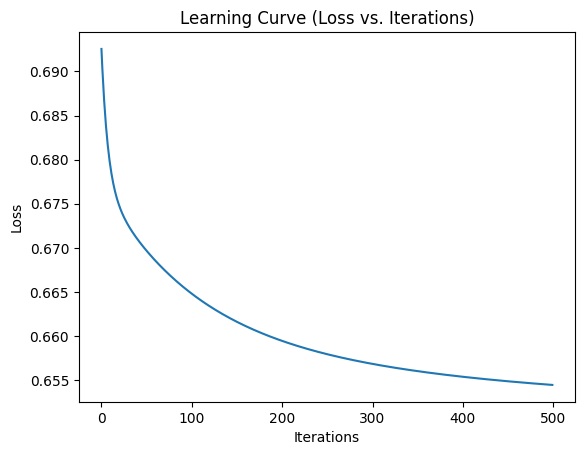

In [166]:
lr.plot_learning_curve(losses)

In [167]:
lr.evaluate(train, train_target)

Accuracy: 62.80%


np.float64(62.79863481228669)

In [168]:
lr.evaluate(valid, valid_target)

Accuracy: 61.11%


np.float64(61.111111111111114)

In [169]:
lr.evaluate(test, test_target)

Accuracy: 61.11%


np.float64(61.111111111111114)